# $$
\text{Approximation de fonctions}
$$

### Objectifs :
- implémenter la méthode d'approximation linéaire par morceaux ;
- implémenter la méthode d'interpolation polynomiale de Lagrange et illustrer le phénomène d'instabilité de Runge.

## I. Approximation linéaire par morceaux

À partir des valeurs $f(x^s_i)$ et $f(x^s_{i+1})$ d'une fonction $f$ aux extrémités d'un segment $[x^s_i, x^s_{i+1}]$, l'approximation linéaire consiste à approcher la fonction $f$ en tout point $x$ de ce segment par la fonction affine $g$ valant $f(x^s_i)$ en $x^s_i$ et $f(x^s_{i+1})$ en $x^s_{i+1}$ :
$$
g(x) = f(x^s_i) + \frac{f(x^s_{i+1}) - f(x^s_i)}{x^s_{i+1} - x^s_i} \, \big( x-x^s_i \big).
$$
Si nous considérons une subdivision $x^s = (a = x_0^s, \ldots, x_{m-1}^s = b)$ d'un segment $[a, b]$, et notons $y^s = (y_0^{s}, \ldots, y_{m-1}^s)$ les valeurs $y_i^{s}=f(x^{s}_i)$ en ces points de la fonction $f$, l'interpolation linéaire par morceaux consiste à effectuer l'approximation linéaire précédente sur chaque segment $[x_i^s, x_{i+1}^s]$.

La fonction `numpy.interp` effectue cette interpolation linéaire par morceaux. Par défaut, elle étend la fonction par la valeur $y^s_0$ pour $x < x_0$, et $y^s_{m-1}$ pour $x > x^s_{m-1}$ :

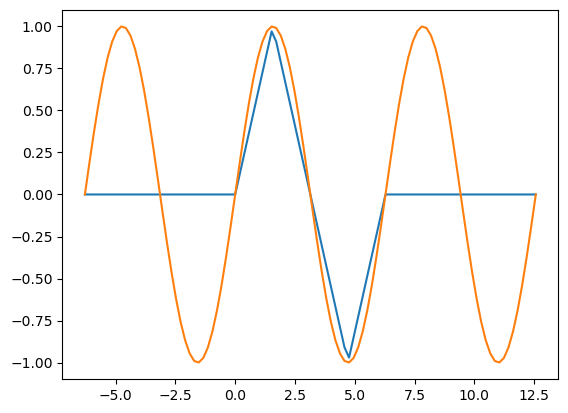

In [1]:
import numpy as np
from matplotlib import pyplot as plt

xs1 = np.linspace(0, 2*np.pi, 5) # subdivision équidistante du segment [0, 2 pi]
ys1 = np.sin(xs1) # application à la fonction sinus

x1 = np.linspace(-2*np.pi, 4*np.pi, 100)
y1 = np.interp(x1, xs1, ys1) # interpolation linéaire suivant cette subdivision de la fonction sinus
y2 = np.sin(x1) # représentation graphique de la fonction sinus

plt.plot(x1, y1)
plt.plot(x1, y2)
plt.show()

## II. Interpolation polynomiale de Lagrange


Nous cherchons désormais à approcher une fonction $f$ par un polynôme $P$. Étant donnés $m$ points $x_0^s$, $\ldots$, $x_{m-1}^s$, le polynôme d'interpolation de Lagrange est l'unique polynôme $P$ de degré $m-1$ qui prend les mêmes valeurs que $f$ en ces points :
$$
\forall 0 \leq i \leq m-1, \, P(x_i^s) = f(x_i^s).
$$

Nous présentons un premier algorithme pour déterminer le polynôme $P$. L'algorithme plus rapide des différences divisées est présentée dans l'exercice 2 ci-dessous.

Nous cherchons $P$ sous la forme
$$
P(x) = a_0 + a_1 (x-x_0^s) + a_2(x-x_1^s) (x-x_0^s) + \ldots + a_{m-1} (x-x_{m-2}^s) \ldots (x-x_1^s) (x-x_0^s),
$$
où les coefficients réels $a_0$, $\ldots$, et $a_{m-1}$ sont à déterminer.

Nous supposons d'abord ces points connus et écrivons un algorithme pour évaluer le polynôme $P$ en un point $x$. Pour $a = (a_0, \ldots, a_{m-1})$ et $x^s = (x^s_0, \ldots, x^s_{m-2})$ fixés, la fonction `eval_poly_lagr(a,xs,x)` retourne la valeur de $P$ au point $x$ :

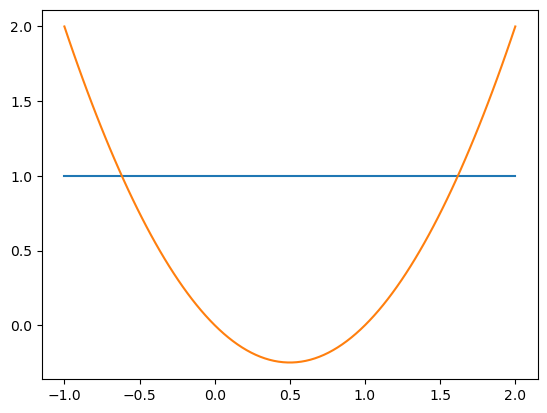

In [2]:
def eval_poly_lagr(a,xs,x):
    m=len(a)
    y=np.ones([m])
    for i in range(1,m):
        y[i]=(x-xs[i-1])*y[i-1] # calcul du vecteur (1,(x-xs[0]),(x-xs[1])(x-xs[0]),...)
    y=a*y # calcul du vecteur (a[0],a[1](x-xs[0]),a[2](x-xs[1])(x-xs[0]),...)
    return(np.sum(y))
# Tests de la fonction eval_poly_lagr
x2=np.linspace(-1,2,100)
a21=np.array([1])
xs21=np.empty(0)
y21=np.array([eval_poly_lagr(a21,xs21,x2[i]) for i in range(100)])
plt.plot(x2,y21) # tracé de la fonction constante égale à 1
a22=np.array([0,0,1])
xs22=np.array([0,1])
y22=np.array([eval_poly_lagr(a22,xs22,x2[i]) for i in range(100)])
plt.plot(x2,y22) # tracé de la fonction x(x-1)
plt.show()

Revenons maintenant à la détermination du polynôme de Lagrange $P$, soit de ses coefficients $a_0$, $\ldots$,$a_{m-1}$. Observons que si les valeurs de $a_0$, $\ldots$, $a_{i-1}$ sont connues, alors il est possible de calculer $a_i$. En effet, nous avons
$$
a_0+a_1(x^s_i-x_0^s)+\ldots+a_{i-1}\Pi_{j=0}^{i-2}(x^s_i-x^s_j)+a_{i}\Pi_{j=0}^{i-1}(x^s_i-x^s_j) = f(x^s_i),
$$
de sorte que
$$
a_i = \frac{f(x^s_i) - \Big( a_0+a_1(x^s_i-x_0^s)+\ldots+a_{i-1}\Pi_{j=0}^{i-2}(x^s_i-x^s_j) \Big)}{\Pi_{j=0}^{i-1}(x^s_i-x^s_j)}.
$$
Dans cette expression, $a_0+a_1(x^s_i-x_0^s)+\ldots+a_{i-1}\Pi_{j=0}^{i-2}(x^s_i-x^s_{j})$ n'est autre que le polynôme d'interpolation de Lagrange de $f$ pour les points $(x^s_0,\ldots,x^s_{i-1})$ évalué en $x^s_i$. Étant données les valeurs $y^s = (f(x_0^s),\ldots,f(x^s_{m-1}))$, la fonction `coef_lagrange(xs,ys)` calcule itérativement les valeurs des coefficients $a_0$, ..., $a_{m-1}$ suivant ce principe :

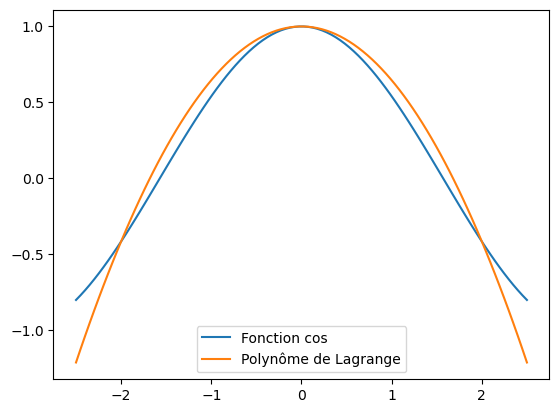

In [3]:
def coef_lagrange(xs,ys):
    m=len(xs)
    a=np.zeros(m)
    a[0]=ys[0]
    for i in range(1,m):
        prod=1
        for j in range(i):           # calcul de (x[i]-x[i-1])*...*(x[i]-x[0])
            prod=prod*(xs[i]-xs[j])    
        a[i]=(ys[i]-eval_poly_lagr(a[0:i],xs[0:i],xs[i]))/prod
    return(a)
# Test de la fonction coef_lagrange pour la fonction cos aux points {-2,0,2}
xs2=np.linspace(-2,2,3)
ys2=np.array([np.cos(xs2[i]) for i in range(3)])
x2=np.linspace(-2.5,2.5,100)
y2=np.array([np.cos(x2[i]) for i in range(100)])
a2=coef_lagrange(xs2,ys2)
ylagr2=np.array([eval_poly_lagr(a2,xs2,x2[i]) for i in range(100)])
plt.plot(x2,y2,label="Fonction cos")
plt.plot(x2,ylagr2,label="Polynôme de Lagrange")
plt.legend()
plt.show()

Il est aussi permis d'utiliser les modules `numpy.polynomial` et `scipy.interpolate` pour déterminer le polynôme d'interpolation de Lagrange. Le module `numpy.polynomial` permet de définir des polynômes et de les évaluer :

In [4]:
import numpy.polynomial as npp
P=npp.Polynomial([1,2,3]) # exemple du polynôme 1+2x+3x^2
print('P(x) =',P,'\n')
print('P(3) =',P(3),'\n') # évaluation de ce polynôme en x=3

P(x) = 1.0 + 2.0·x + 3.0·x² 

P(3) = 34.0 



Le module `scipy.interpolate` contient alors une fonction `scipy.interpolate.lagrange` qui donne la valeur du polynôme d'interpolation de Lagrange d'une fonction. Notons que la fonction `scipy.interpolate.lagrange` renvoie en pratique un polynôme de la classe `numpy.poly1d`, qui est une version antérieure de la classe reliée au module `numpy.polynomial` :

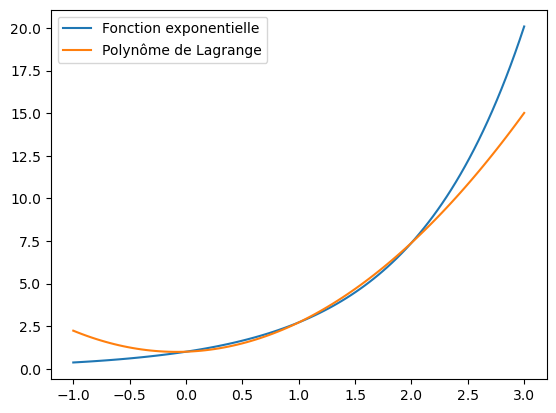

In [5]:
import scipy.interpolate as scint
xs3 = np.array([0, 1, 2]) # valeurs des points d'interpolation
ys3 = np.exp(xs3) # valeurs de la fonction exponentielle aux points d'interpolation
plagr3 = scint.lagrange(xs3, ys3)
x3=np.linspace(-1,3,100)
y3=np.exp(x3)
y3lagr=plagr3(x3)
plt.plot(x3,y3,label="Fonction exponentielle")
plt.plot(x3,y3lagr,label="Polynôme de Lagrange")
plt.legend()
plt.show()

## Exercices

### Exercice 1.

Considérons une subdivision $x^s = (a = x_0^s, \ldots, x_{m-1}^s = b)$ d'un segment $[a, b]$ et une fonction $f$ définie sur ce segment.

1. Étant donnés des points $x = (x_0, \ldots, x_{n-1})$ tels que $x_0^s \leq x_0<...<x_{n-1}\leq x^{s}_{m-1}$, écrire une fonction`linpm(x,xs,ys)` qui renvoie la suite des valeurs $y = (y_0, \ldots y _{n-1})$, où chaque nombre $y_i$ correspond à la valeur en $x_i$ de l'approximation linéaire par morceaux de $f$.

2. Illustrer votre fonction `linpm` en représentant les courbes sur l'intervalle $[-1, 1]$ de la fonction $f(x) = \cos(x)$, ainsi que de son approximation linéaire par morceaux associée à la subdivision $(x_0^s, x_1^s, x_2^s, x_3^s,x_4^s) = (-1, -0.5, 0, 0.5, 1)$.

### Exercice 2 : Algorithme des différences divisées.


La rapidité d'exécution de la fonction `coef_lagrange` peut être améliorée. Cette affirmation repose sur le calcul suivant des coefficients $(a_i)_{0 \leq i \leq m-1}$ :

**Théorème :** Le polynôme d'interpolation de Lagrange $P$ de la fonction $f$ aux points distincts $(x_i)_{0 \leq i \leq n}$ est donné par l'expression
$$
P(x) = \sum_{i = 0}^{m-1} f[x_0,...,x_i] \Pi_{j=0}^{i-1} \big( x - x_j^s \big),
$$
où la notation $f[\cdot]$ désigne les différences divisées successives de la fonction $f$ définies suivant les formules de récurrence
$$
\forall 0 \leq i \leq m-1, \, f[x_i] = f(x_i),
$$
et
$$
\forall 1 \leq k \leq m-1, \, f[x_0, \ldots, x_k] = \frac{f[x_1,\ldots,x_k]-f[x_0,\ldots,x_{k-1}]}{x_k-x_0}.
$$

1.a. Écrire une fonction `coef_lagrange_diff(xs,ys)` qui calcule les coefficients $(a_0,a_1,\ldots,a_{m-1}) = (f[x_0],f[x_0,x_1],\ldots,f[x_0,x_1,\ldots,x_{m-1}])$ à l'aide de la formule récursive des différences divisées.

b. Tester cette fonction sur un exemple.

2.a. Vérifier que l'exécution de la fonction `eval_poly_lag` nécessite $4 m + O(1)$ opérations.

b. Montrer que l'exécution de la fonction `coef_lagrange` nécessite $3 m^2 + O(m)$ opérations.

3. Vérifier que l'exécution de la fonction `coef_lagrange_diff` ne nécessite que $3 m^2 / 2 + O(m)$ opérations.

### Exercice 3 : Illustration du phénomène de Runge.


Considérons la fonction
$$
\forall x \in \mathbb{R}, \, f(x) = \frac{1}{1 + 25x^2}.
$$

1. Représenter graphiquement la fonction $f$ sur l'intervalle $[-1,1]$.

2. À l'aide de la fonction `scipy.interpolate.lagrange(x,y)`, représenter graphiquement le polynôme d'interpolation de $f$ pour les points ${-1, 0, 1}$ sur l'intervalle $[-1, 1]$.

3. Représenter sur un même graphique la fonction $f$, son polynôme d'interpolation pour les $7$ points $\{-1, -2/3,-1/3, 0, 1/3, 2/3, 1 \}$, et son polynôme d'interpolation pour les $11$ points $\{- 1, -4/5, -3/5, -2/5, -1/5, 0, 1/5, 2/5, 3/5, 4/5, 1\}$ de l'intervalle $[-1,1]$.

Ce tracé illustre le phénomène de Runge : la suite de polynômes d'interpolation de Lagrange de la fonction $f$ en les $n+1$ points équirépartis $\{-1+2i/n\}_{0 \leq i \leq n}$ ne converge pas uniformément vers la fonction $f$. Ce phénomène est relié à l'instabilité de l'interpolation de Lagrange sur un intervalle.

Comme pour l'approximation linéaire par morceaux, il est en pratique fréquent de commencer par procéder à une subdivision de l'intervalle considéré en sous-intervalles plus petits, puis d'approcher la fonction $f$ par son polynôme d'interpolation de Lagrange sur chacun de ces sous-intervalles.